In [59]:
"""Imports sorted by libraries"""

#Base libraries
import os
import time
import warnings
import requests
from datetime import datetime 
from datetime import date
from datetime import timedelta


#Pandas
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.set_option('display.max_columns', 100)

#Numpy
import numpy as np

#Matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#Beautifulsoup
from bs4 import BeautifulSoup

#Plotly
import plotly.express as px
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

In [60]:
#References
teams = {'ATL':'Atlanta', 'BKN':'Brooklyn', 
         'BOS':'Boston',  'CHA':'Charlotte', 
         'CHI':'Chicago', 'CLE':'Cleveland', 
         'DAL':'Dallas',  'DEN':'Denver', 
         'DET':'Detroit', 'GSW':'Golden St.', 
         'HOU':'Houston', 'IND':'Indiana', 
         'LAC':'L.A. Clippers', 'LAL':'L.A. Lakers', 
         'MEM':'Memphis', 'MIA':'Miami', 
         'MIL':'Milwaukee', 'MIN':'Minnesota', 
         'NOP':'New Orleans', 'NYK':'New York', 
         'OKC':'Oklahoma City', 'ORL':'Orlando', 
         'PHI':'Philadelphia', 'PHO':'Phoenix', 
         'POR':'Portland', 'SAC':'Sacramento', 
         'SAS':'San Antonio', 'TOR':'Toronto', 
         'UTA':'Utah', 'WAS':'Washington'}

abbr = list(teams.keys())
location = list(teams.values())

team_df = pd.DataFrame(list(zip(abbr, location)), columns = ['Abbreviation', 'Team'])

In [61]:
def scrape_site(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    soup.prettify()
    site_data = pd.read_html(url)
    
    return site_data

In [62]:
def get_ratio_pct(df, column):
    new = df[column].str.split("-", expand=True)
    new['Wins'] = new[0]
    new['Losses'] = new[1]
    new['Wins'] = new['Wins'].astype('int')
    new['Losses'] = new['Losses'].astype('int')
    new['PCT'] = round(new['Wins'] / (new['Wins'] + new['Losses']),3)
    df[column] = new['PCT']

    

def prepare_standings_df(soup):
    #Eastern Conference
    df1 = soup[0]
    df1.columns = [''] * len(df1.columns)
    df1.columns = ['Seed', 'Team', 'W', 'L', 'W/L', 'GB', 'PPG', 'OPPG', 'DIFF', 'Home', 'Road',
              'Div', 'Conf', 'Streak', 'L10', 'Win Proj', 'Win Div %', 'Post %']
    df1['Conference'] = 'East'
    game_ratios = ['Home', 'Road', 'Div', 'Conf', 'L10']
    for column in game_ratios:
        get_ratio_pct(df1, column)
    
    
    #Western Conference
    df2 = soup[1]
    df2.columns = [''] * len(df2.columns)
    df2.columns = ['Seed', 'Team', 'W', 'L', 'W/L', 'GB', 'PPG', 'OPPG', 'DIFF', 'Home', 'Road',
              'Div', 'Conf', 'Streak', 'L10', 'Win Proj', 'Win Div %', 'Post %']
    df2['Conference'] = 'West'
    game_ratios = ['Home', 'Road', 'Div', 'Conf', 'L10']
    for column in game_ratios:
        get_ratio_pct(df2, column)
    
    standings = pd.concat([df1, df2])
    
    return standings

In [63]:
#Scraping lineup data

#URL to scrape from

url = "https://www.cbssports.com/nba/standings/"

records = scrape_site(url)

standings = prepare_standings_df(records)

standings = standings.merge(team_df, on='Team')

standings['Team'] = standings['Abbreviation']
standings = standings.drop(columns='Abbreviation')

standings

,Seed,Team,W,L,W/L,GB,PPG,OPPG,DIFF,Home,Road,Div,Conf,Streak,L10,Win Proj,Win Div %,Post %,Conference
0,1.0,MIL,48,8,0.857,—,119.7,107.3,12.4,0.897,0.815,0.923,0.882,W2,0.8,66.0,100.0%,100.0%,East
1,2.0,TOR,42,15,0.737,6.5,113.3,106.1,7.2,0.767,0.704,0.667,0.789,W2,0.9,57.9,85.9%,100.0%,East
2,3.0,BOS,39,17,0.696,9.0,113.3,106.6,6.7,0.821,0.571,0.583,0.735,L1,0.8,54.0,13.4%,100.0%,East
3,4.0,MIA,36,20,0.643,12.0,112.1,108.7,3.4,0.885,0.433,0.727,0.750,W1,0.4,52.2,100.0%,100.0%,East
4,5.0,PHI,35,22,0.614,13.5,108.5,106.4,2.1,0.929,0.310,0.714,0.605,L1,0.5,50.3,<1.0%,100.0%,East
5,6.0,IND,33,24,0.579,15.5,109.2,107.8,1.4,0.655,0.500,0.500,0.568,L1,0.3,46.1,0.0%,100.0%,East
6,7.0,BKN,26,29,0.473,21.5,110.5,110.6,-0.1,0.571,0.370,0.357,0.514,W1,0.7,38.7,0.0%,98.9%,East
7,8.0,ORL,24,32,0.429,24.0,104.0,105.7,-1.7,0.517,0.333,0.667,0.500,L1,0.3,37.0,0.0%,97.3%,East
8,NaN,WAS,20,35,0.364,27.5,115.5,119.8,-4.3,0.481,0.250,0.333,0.400,L2,0.5,29.9,0.0%,1.8%,East
9,NaN,CHI,20,38,0.345,29.0,106.4,109.5,-3.1,0.400,0.286,0.429,0.359,W1,0.2,29.7,0.0%,1.6%,East


In [64]:
#Scraping lineup data


#URL to scrape from

url = "https://www.cbssports.com/nba/injuries/"


inactives = scrape_site(url)

inactives = pd.concat([inactive for inactive in inactives])



new = inactives['Player'].str.split(' ', n = 5, expand = True)

inactives['first name'] = new[3]

inactives['second name'] = new[4]

inactives['full'] = inactives['first name'] + " " + inactives['second name']

injury_report = inactives['Player'].tolist()

inactives.head(n=40)

,Player,Position,Updated,Injury,Injury Status,first name,second name,full
0,D. Bembry DeAndre' Bembry,SG,"Sun, Feb 23",Abdomen,Expected to be out until at least Feb 26,DeAndre',Bembry,DeAndre' Bembry
1,D. Hunter De'Andre Hunter,SF,"Sun, Feb 23",Personal,Game Time Decision,De'Andre,Hunter,De'Andre Hunter
2,C. Capela Clint Capela,C,"Wed, Feb 19",Heel,Expected to be out until at least Mar 6,Clint,Capela,Clint Capela
3,S. Labissiere Skal Labissiere,PF,"Wed, Feb 19",Knee,Expected to be out until at least Mar 6,Skal,Labissiere,Skal Labissiere
0,T. Fall Tacko Fall,C,"Mon, Feb 24",Undisclosed,Game Time Decision,Tacko,Fall,Tacko Fall
1,K. Walker Kemba Walker,PG,"Sun, Feb 23",Knee,Game Time Decision,Kemba,Walker,Kemba Walker
2,R. Williams Robert Williams,C,"Wed, Feb 19",Hip,Expected to be out until at least Feb 29,Robert,Williams,Robert Williams
0,K. Irving Kyrie Irving,PG,"Thu, Feb 20",Shoulder,Out for the season,Kyrie,Irving,Kyrie Irving
1,K. Durant Kevin Durant,SF,"Thu, Oct 31",Achilles,Out for the season,Kevin,Durant,Kevin Durant
0,L. Kornet Luke Kornet,PF,"Sun, Feb 23",Ankle,Game Time Decision,Luke,Kornet,Luke Kornet


In [65]:
#Upload datasets
sched = pd.read_csv(r"C:\Users\Elite Fitness Center\Documents\nba_sched.csv") #this does not need to be updated
pbp = pd.read_csv(r"C:\Users\Elite Fitness Center\Documents\nba_data.csv") 

#Polishing
pbp['game_id'] = pd.to_numeric(pbp['game_id'], errors='coerce')
pbp['game_id'].fillna(0, inplace = True)
pbp['game_id'] = pbp['game_id'].astype(int)


#Combine datasets to include matched home/away abbreviations
merged = pd.merge(pbp, sched, on='game_id')

#Combine individual player columns into home and away lineups
merged['home_lineup'] = merged['h1'] + ", " + merged['h2'] + ", " + merged['h3'] + ", " + merged['h4'] + ", " + merged['h5']
merged['away_lineup'] = merged['a1'] + ", " + merged['a2'] + ", " + merged['a3'] + ", " + merged['a4'] + ", " + merged['a5'] 

#Create a defense column as well as point differential 
merged['defense'] = np.where(merged['team']==merged['home_abbrev'], merged['away_abbrev'], merged['home_abbrev'])
merged['point_diff'] = np.where(merged['team']==merged['home_abbrev'], merged['home_score'] - merged['away_score'], merged['away_score'] - merged['home_score'])


#Unneeded columns
junk_cols = ['h1', 'h2', 'h3', 'h4', 'h5',
             'a1', 'a2', 'a3', 'a4', 'a5', 
             'data_set']

#Remove unneeded columns
merged.drop(columns=junk_cols, axis=1, inplace=True)

#Reorder columns
merged = merged[['game_id', 'date_x', 'date_y', 'home_abbrev', 'away_abbrev', 'home_lineup', 'away_lineup',
                 'period', 'away_score', 'home_score', 'point_diff', 'remaining_time','elapsed', 
                 'play_length', 'play_id', 'team', 'defense', 'event_type', 'assist', 'away', 
                 'home', 'block', 'entered', 'left', 'num', 'opponent', 'outof', 'player', 'points', 
                 'possession', 'reason', 'result', 'steal', 'type', 'shot_distance', 'original_x', 
                 'original_y', 'converted_x', 'converted_y', 'description']]

In [66]:
#Manipulating dataframe datetime columns
merged = merged.replace('00:-12:00', '0:00:00')
merged = merged.replace('00:-5:00', '0:00:00')

merged['play_start'] = pd.to_datetime(merged['elapsed'], format='%H:%M:%S') -  pd.to_timedelta(merged['play_length'])
merged['play_end'] = pd.to_datetime(merged['play_start'], format='%H:%M:%S') +  pd.to_timedelta(merged['play_length'])


period_dictionary ={1 : pd.to_datetime("00:00:00", format='%H:%M:%S'),
                    2 : pd.to_datetime("00:12:00", format='%H:%M:%S'), 
                    3 : pd.to_datetime("00:24:00", format='%H:%M:%S'),
                    4 : pd.to_datetime("00:36:00", format='%H:%M:%S')} 

merged['running'] = merged['period'].map(period_dictionary)

merged['play_start'] = merged['play_start'] +  pd.to_timedelta(merged['running'])
merged['play_end'] = merged['play_end'] + pd.to_timedelta(merged['running'])

merged['date_x'] == merged['date_x'].astype('datetime64[ns]')

merged['minute_flr'] = merged['play_end'].dt.floor("T")
merged['minute_flr'] = pd.to_datetime(merged['minute_flr']).dt.time

merged.head(n=15)

,game_id,date_x,date_y,home_abbrev,away_abbrev,home_lineup,away_lineup,period,away_score,home_score,point_diff,remaining_time,elapsed,play_length,play_id,team,defense,event_type,assist,away,home,block,entered,left,num,opponent,outof,player,points,possession,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,play_start,play_end,running,minute_flr
0,21900001,10/22/2019,10/22/2019,TOR,NOP,"OG Anunoby, Pascal Siakam, Marc Gasol, Kyle Lo...","Jrue Holiday, Brandon Ingram, Derrick Favors, ...",1,0,0,0,0:12:00,0:00:00,0:00:00,2,NaN,TOR,start of period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,1830-01-01 00:00:00,1830-01-01 00:00:00,1900-01-01,00:00:00
1,21900001,10/22/2019,10/22/2019,TOR,NOP,"OG Anunoby, Pascal Siakam, Marc Gasol, Kyle Lo...","Jrue Holiday, Brandon Ingram, Derrick Favors, ...",1,0,0,0,0:12:00,0:00:00,0:00:00,4,NOP,TOR,jump ball,NaN,Derrick Favors,Marc Gasol,NaN,NaN,NaN,NaN,NaN,NaN,Marc Gasol,NaN,Lonzo Ball,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Gasol vs. Favors: Tip to Ball,1830-01-01 00:00:00,1830-01-01 00:00:00,1900-01-01,00:00:00
2,21900001,10/22/2019,10/22/2019,TOR,NOP,"OG Anunoby, Pascal Siakam, Marc Gasol, Kyle Lo...","Jrue Holiday, Brandon Ingram, Derrick Favors, ...",1,0,0,0,0:11:48,0:00:12,0:00:12,7,NOP,TOR,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lonzo Ball,0.0,NaN,NaN,missed,NaN,unknown,11.0,2,114,24.8,16.4,MISS Ball 11 Driving Floating Jump Shot,1830-01-01 00:00:00,1830-01-01 00:00:12,1900-01-01,00:00:00
3,21900001,10/22/2019,10/22/2019,TOR,NOP,"OG Anunoby, Pascal Siakam, Marc Gasol, Kyle Lo...","Jrue Holiday, Brandon Ingram, Derrick Favors, ...",1,0,0,0,0:11:47,0:00:13,0:00:01,8,NOP,TOR,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Derrick Favors,NaN,NaN,NaN,NaN,NaN,rebound offensive,NaN,NaN,NaN,NaN,NaN,Favors REBOUND (Off:1 Def:0),1830-01-01 00:00:12,1830-01-01 00:00:13,1900-01-01,00:00:00
4,21900001,10/22/2019,10/22/2019,TOR,NOP,"OG Anunoby, Pascal Siakam, Marc Gasol, Kyle Lo...","Jrue Holiday, Brandon Ingram, Derrick Favors, ...",1,2,0,2,0:11:47,0:00:13,0:00:00,9,NOP,TOR,shot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Derrick Favors,2.0,NaN,NaN,made,NaN,unknown,1.0,0,-6,25.0,4.4,Favors 1 Tip Layup Shot (2 PTS),1830-01-01 00:00:13,1830-01-01 00:00:13,1900-01-01,00:00:00
5,21900001,10/22/2019,10/22/2019,TOR,NOP,"OG Anunoby, Pascal Siakam, Marc Gasol, Kyle Lo...","Jrue Holiday, Brandon Ingram, Derrick Favors, ...",1,2,0,-2,0:11:29,0:00:31,0:00:18,10,TOR,NOP,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG Anunoby,0.0,NaN,NaN,missed,NaN,unknown,3.0,15,28,26.5,86.2,MISS Anunoby 3 Driving Layup,1830-01-01 00:00:13,1830-01-01 00:00:31,1900-01-01,00:00:00
6,21900001,10/22/2019,10/22/2019,TOR,NOP,"OG Anunoby, Pascal Siakam, Marc Gasol, Kyle Lo...","Jrue Holiday, Brandon Ingram, Derrick Favors, ...",1,2,0,2,0:11:25,0:00:35,0:00:04,11,NOP,TOR,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JJ Redick,NaN,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Redick REBOUND (Off:0 Def:1),1830-01-01 00:00:31,1830-01-01 00:00:35,1900-01-01,00:00:00
7,21900001,10/22/2019,10/22/2019,TOR,NOP,"OG Anunoby, Pascal Siakam, Marc Gasol, Kyle Lo...","Jrue Holiday, Brandon Ingram, Derrick Favors, ...",1,2,0,2,0:11:16,0:00:44,0:00:09,12,NOP,TOR,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jrue Holiday,0.0,NaN,NaN,missed,NaN,Driving Finger Roll Layup,8.0,81,-1,16.9,4.9,MISS Holiday 8 Driving Finger Roll Layup,1830-01-01 00:00:35,1830-01-01 00:00:44,1900-01-01,00:00:00
8,21900001,10/22/2019,10/22/2019,TOR,NOP,"OG Anunoby, Pascal Siakam, Marc Gasol, Kyle Lo...","Jrue Holiday, Brandon Ingram, Derrick Favors, ...",1,2,0,-2,0:11:15,0:00:45,0:00:01,13,TOR,NOP,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fred VanVleet,NaN,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,VanVleet REBOUND (Off:0 Def:1),1830-01-01 00:00:44,1830-01-01 00:00:45,1900-01-01,00:00:00
9,21900001,10/22/2019,10/22/2019,TOR,NOP,"OG Anunoby, Pascal Siakam, Marc Gasol, 

In [67]:
#Filter functions

def filter_team(team): #Filter for team
    team_query = merged[(merged.loc[:,'home_abbrev']==team)|(merged.loc[:,'away_abbrev']==team)]
    team_query['team_lineup'] = np.where(team_query.loc[:,'home_abbrev']==team, team_query['home_lineup'], team_query['away_lineup'])
    team_query['opp_lineup'] = np.where(team_query.loc[:,'home_abbrev']!=team, team_query['home_lineup'], team_query['away_lineup'])
    team_query['Opp'] = np.where(team_query.loc[:,'home_abbrev']!=team, team_query['home_abbrev'], team_query['away_abbrev'])
    return team_query

def filter_home_away(home_away, df): #Filter for home/away
    if len(home_away) > 0:
        if home_away == 'home':
            loc_query = df[(df['home_abbrev']==team)]
        elif home_away == 'away':
            loc_query = df[(df['away_abbrev']==team)]
        else:
            print('home_away input incorrect')
            return df
            
        return loc_query
    else:
        return df

def filter_date(start_date, end_date, df): #Filter by date range
    date_query = df

    if len(start_date) > 0:
        date_query = date_query[date_query['date_y'] >= start_date]
    elif len(end_date) > 0:
         date_query = date_query[date_query['date_y'] <= end_date]
            
    return date_query

def filter_included_players(inc_players, df): #Filter for required players
    if len(inc_players) > 0:
        temp_df = pd.DataFrame()

        for p in inc_players:
            df = df[df['team_lineup'].str.contains(p)]

        temp_df = temp_df.append(df)
        
        return temp_df
    
    else:
        return df
    
def filter_excluded_players(exc_players, df): #Filter for excluded players 
    if len(exc_players) > 0:
        temp_df = pd.DataFrame()

        for i in exc_players:
            df = df[df['team_lineup'].str.contains(i, na=False)==False] #replaced player_query= with df=
            
        temp_df = temp_df.append(df) #appended df instead of player_query
            
        
        return temp_df
    
    else:
        return df

In [68]:
#Functions with dependencies

def back_to_backs(df):#find the dates of back-to-back games
    temp_df = df
    temp_df['date_x'] = pd.to_datetime(temp_df['date_x']).dt.date
    games = temp_df['date_x'].unique()
    
    consec_games = []
    
    for game in games:
        if game + timedelta(days=1) in games:
            consec_games.append(game)
            consec_games.append(game + timedelta(days=1))  
    return consec_games

def filter_b2b(head_tail, df): #filter by head/tail of a back-to-back
    temp_df = df
    temp_df['date_x'] = pd.to_datetime(temp_df['date_x']).dt.date
    games = back_to_backs(df)
    if head_tail == 'head':
        b2b_head = games[::2]
        head_df = temp_df[temp_df['date_x'].isin(b2b_head)]
        return head_df
    elif head_tail == 'tail':
        b2b_tail = games[1::2]
        tail_df = temp_df[temp_df['date_x'].isin(b2b_tail)]
        return tail_df    
    else:
        return temp_df
    
def get_roster(df):
    teammates = df['team_lineup'].unique()
    teammates = teammates.tolist()
    teammates = [i.split(", ") for i in teammates]
    flat_teammates = [item for sublist in teammates for item in sublist]
    flat_teammates = list(dict.fromkeys(flat_teammates))
    
    return flat_teammates

def filter_record(record, minimum, maximum, df):
    temp_df = df
    temp_query = standings[standings[record].between(minimum, maximum,inclusive=True)]
    opponents = temp_query['Team'].unique()
    temp_df = temp_df[temp_df['Opp'].isin(opponents)]
    return temp_df


        
def run_filters(team, home_away, start_date, end_date, inc_players, exc_players, head_tail, record, minimum, maximum):
    temp_df = filter_team(team)
    temp_df = filter_home_away(home_away, temp_df)
    temp_df = filter_date(start_date, end_date, temp_df)
    temp_df = filter_included_players(inc_players, temp_df)
    temp_df = filter_excluded_players(exc_players, temp_df)
    temp_df = filter_b2b(head_tail, temp_df)
    temp_df = filter_record(record, minimum, maximum, temp_df)
    temp_df = pd.DataFrame(temp_df)
    return temp_df

In [69]:
team = 'HOU'
home_away = ''
start_date = '10/25/2019'
end_date = '10/25/2020'
inc_players = []
exc_players = []
head_tail = 'all'
record = 'W/L'
minimum = .500
maximum = 1.000

run_filters(team, home_away, start_date, end_date, inc_players, exc_players, head_tail, record, minimum, maximum)

,game_id,date_x,date_y,home_abbrev,away_abbrev,home_lineup,away_lineup,period,away_score,home_score,point_diff,remaining_time,elapsed,play_length,play_id,team,defense,event_type,assist,away,home,block,entered,left,num,opponent,outof,player,points,possession,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,play_start,play_end,running,minute_flr,team_lineup,opp_lineup,Opp
22111,21900045,2019-10-28,10/28/2019,HOU,OKC,"Danuel House Jr., PJ Tucker, Clint Capela, Jam...","Terrance Ferguson, Danilo Gallinari, Steven Ad...",1,0,0,0,0:12:00,0:00:00,0:00:00,2,NaN,HOU,start of period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN,1830-01-01 00:00:00,1830-01-01 00:00:00,1900-01-01 00:00:00,00:00:00,"Danuel House Jr., PJ Tucker, Clint Capela, Jam...","Terrance Ferguson, Danilo Gallinari, Steven Ad...",OKC
22112,21900045,2019-10-28,10/28/2019,HOU,OKC,"Danuel House Jr., PJ Tucker, Clint Capela, Jam...","Terrance Ferguson, Danilo Gallinari, Steven Ad...",1,0,0,0,0:12:00,0:00:00,0:00:00,4,OKC,HOU,jump ball,NaN,Steven Adams,Clint Capela,NaN,NaN,NaN,NaN,NaN,NaN,Clint Capela,NaN,Shai Gilgeous-Alexander,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Capela vs. Adams: Tip to Gilgeous-Al...,1830-01-01 00:00:00,1830-01-01 00:00:00,1900-01-01 00:00:00,00:00:00,"Danuel House Jr., PJ Tucker, Clint Capela, Jam...","Terrance Ferguson, Danilo Gallinari, Steven Ad...",OKC
22113,21900045,2019-10-28,10/28/2019,HOU,OKC,"Danuel House Jr., PJ Tucker, Clint Capela, Jam...","Terrance Ferguson, Danilo Gallinari, Steven Ad...",1,0,0,0,0:11:35,0:00:25,0:00:25,8,OKC,HOU,miss,NaN,NaN,NaN,PJ Tucker,NaN,NaN,NaN,NaN,NaN,Steven Adams,0.0,NaN,NaN,missed,NaN,Turnaround Hook Shot,9.0,77,47,17.3,9.7,"MISS Adams 9 Turnaround Hook Shot, Tucker BLOC...",1830-01-01 00:00:00,1830-01-01 00:00:25,1900-01-01 00:00:00,00:00:00,"Danuel House Jr., PJ Tucker, Clint Capela, Jam...","Terrance Ferguson, Danilo Gallinari, Steven Ad...",OKC
22114,21900045,2019-10-28,10/28/2019,HOU,OKC,"Danuel House Jr., PJ Tucker, Clint Capela, Jam...","Terrance Ferguson, Danilo Gallinari, Steven Ad...",1,0,0,0,0:11:34,0:00:26,0:00:01,10,HOU,OKC,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PJ Tucker,NaN,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Tucker REBOUND (Off:0 Def:1),1830-01-01 00:00:25,1830-01-01 00:00:26,1900-01-01 00:00:00,00:00:00,"Danuel House Jr., PJ Tucker, Clint Capela, Jam...","Terrance Ferguson, Danilo Gallinari, Steven Ad...",OKC
22115,21900045,2019-10-28,10/28/2019,HOU,OKC,"Danuel House Jr., PJ Tucker, Clint Capela, Jam...","Terrance Ferguson, Danilo Gallinari, Steven Ad...",1,0,0,0,0:11:28,0:00:32,0:00:06,11,HOU,OKC,miss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russell Westbrook,0.0,NaN,NaN,missed,NaN,Driving Finger Roll Layup,2.0,11,22,26.1,86.8,MISS Westbrook 2 Driving Finger Roll Layup,1830-01-01 00:00:26,1830-01-01 00:00:32,1900-01-01 00:00:00,00:00:00,"Danuel House Jr., PJ Tucker, Clint Capela, Jam...","Terrance Ferguson, Danilo Gallinari, Steven Ad...",OKC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382559,21900806,2020-02-11,2/11/2020,HOU,BOS,"Danuel House Jr., Isaiah Hartenstein, Chris Cl...","Carsen Edwards, Brad Wanamaker, Grant Williams...",4,103,116,-13,0:00:25,0:11:35,0:00:01,691,BOS,HOU,rebound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grant Williams,NaN,NaN,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Williams REBOUND (Off:1 Def:3),1830-01-01 00:47:34,1830-01-01 00:47:35,1900-01-01 00:36:00,00:47:00,"Danuel House Jr., Isaiah Hartenstein, Chris Cl...","Carsen Edwards, Brad Wanamaker, Grant Williams...",BOS
382560,21900806,2020-02-11,2/11/2020,HOU,BOS,"Danuel House Jr., Isaiah Hartenstein, Chris Cl...","Carsen Edwards, Brad Wanamaker, Grant Williams...",4,103,116,13,0:00:17,0:11:43,0:00:08,692,HOU,BOS,foul,NaN,NaN,NaN,NaN,Na

In [70]:
#Stat aggregation functions

def filter_player(player, df): #return only rows where player is in the lineup 
    player_search = df[df['team_lineup'].str.contains(player, na=False)==True]
    return player_search

def player_is_player(player, df): #returns only rows where player is active player
    active_player = df[df['player']==player]
    return active_player

def calc_min_played(player, df): #returns minutes played for a player
    player_search = filter_player(player, df)
    player_search['play_length'] = pd.to_datetime(player_search['play_length'], format='%H:%M:%S')
    secs_player = player_search['play_length'].dt.second.sum()
    
    return round(secs_player/60,2)

def calc_games_played(player, df): 
    """returns number of games a player has played"""
    temp_df = filter_player(player, df)
    games_played = temp_df['game_id'].nunique()
    return games_played

def calc_event_count(player, df, event): 
    """calculate shots, misses, rebounds, or turnovers"""
    temp_df = filter_player(player, df)
    temp_df = player_is_player(player, temp_df)
    temp_df = temp_df[temp_df['event_type'] == event]
    event_no = len(temp_df)
    return event_no

def calc_total_points(player, df):
    temp_df = filter_player(player, df)
    temp_df = player_is_player(player, temp_df)
    points = temp_df['points'].sum()
    return points

def calc_three_pointers(player, df):
    temp_df = filter_player(player, df)
    temp_df = player_is_player(player, temp_df)
    temp_df = temp_df[temp_df['points']==3]
    threes = temp_df['points'].sum()
    return threes

def calc_peripheral(player, df, col): 
    """Calculate number of assist, steal, or block"""
    temp_df = filter_player(player, df)
    temp_df = temp_df[temp_df[col].str.contains(player, na=False)==True]
    peripheral_no = len(temp_df)
    return peripheral_no

def calc_unassisted_shots(player, df): 
    """Calculate number of unassisted shots"""
    temp_df = filter_player(player, df)
    temp_df = player_is_player(player, temp_df)
    temp_df = temp_df[temp_df['event_type'] == 'shot']
    assisting_no = temp_df['assist'].isnull().sum()
    return assisting_no

def calc_shot_range(player, df, mini, maxi, event): 
    """calculates shot/miss at a given shot threshold.
    Typical ranges are 0-3, 4-9, 10-15, 16-23, 24-29, and 30+"""
    temp_df = filter_player(player, df)
    temp_df = player_is_player(player, temp_df)
    temp_df = temp_df[temp_df['event_type'] == event]
    temp_df = temp_df[(temp_df['shot_distance']>= mini) & (temp_df['shot_distance']<= maxi)]
    range_count = len(temp_df)
    return range_count

In [71]:
def calc_stats(team):
    temp_df = filter_team(team)
    teammates = get_roster(temp_df)
    
    #initialized lists
    min_log = []
    game_log = []
    point_log = []
    assist_log = []
    rebound_log = []
    block_log = []
    steal_log = []
    turnover_log = []      
    three_log = []
    fgm_log = []
    miss_log = []
    assisting_log = []
    zero_three_log = []
    four_nine_log = []
    ten_fifteen_log = []
    sixteen_twentythree_log = []
    twentyfour_twentynine_log = []
    thirty_plus_log = []
    zero_three_miss_log = []
    four_nine_miss_log = []
    ten_fifteen_miss_log = []
    sixteen_twentythree_miss_log = []
    twentyfour_twentynine_miss_log = []
    thirty_plus_miss_log = []
    
    #stat calculations
    
    for player in teammates: #minutes played
        mins_player = calc_min_played(player, temp_df)
        min_log.append(mins_player)
        
    for player in teammates: #number of games played
        game_count = calc_games_played(player, temp_df)
        game_log.append(game_count)
        
    for player in teammates: #number of FGM
        shot_count = calc_event_count(player, temp_df, 'shot')
        fgm_log.append(shot_count)
        
    for player in teammates: #number of misses
        shot_count = calc_event_count(player, temp_df, 'miss')
        miss_log.append(shot_count)
    
    for player in teammates: #total points scored
        points = calc_total_points(player, temp_df)
        point_log.append(points)
        
    for player in teammates: #3 pointers scored
        threes = calc_three_pointers(player, temp_df)
        three_log.append(threes)
    
    for player in teammates: #assists
        assists = calc_peripheral(player, temp_df, 'assist')
        assist_log.append(assists)
        
    for player in teammates: #rebounds
        rebounds = calc_event_count(player, temp_df, 'rebound')
        rebound_log.append(rebounds)
        
    for player in teammates: #steals
        steals = calc_peripheral(player, temp_df, 'steal')
        steal_log.append(steals)
        
    for player in teammates: #blocks
        blocks = calc_peripheral(player, temp_df, 'block')
        block_log.append(blocks)
        
    for player in teammates: #turnovers
        turnovers = calc_event_count(player, temp_df, 'turnover')
        turnover_log.append(turnovers)
        
    for player in teammates: #unassisted fg
        unassisted = calc_unassisted_shots(player, temp_df)
        assisting_log.append(unassisted)
        
    for player in teammates: #0-3 made
        zero_three = calc_shot_range(player, temp_df, 0, 3, 'shot')
        zero_three_log.append(zero_three)
        
    for player in teammates: #4-9 made
        four_nine = calc_shot_range(player, temp_df, 4, 9, 'shot')
        four_nine_log.append(four_nine)
        
    for player in teammates: #10-15 made
        ten_fifteen = calc_shot_range(player, temp_df, 10, 15, 'shot')
        ten_fifteen_log.append(ten_fifteen)
        
    for player in teammates: #16-23 made
        sixteen_twentythree = calc_shot_range(player, temp_df, 16, 23, 'shot')
        sixteen_twentythree_log.append(sixteen_twentythree)
        
    for player in teammates: #24-29 made
        twentyfour_twentynine = calc_shot_range(player, temp_df, 24, 29, 'shot')
        twentyfour_twentynine_log.append(twentyfour_twentynine)
        
    for player in teammates: #30+ made
        thirty_plus = calc_shot_range(player, temp_df, 24, 60, 'shot')
        thirty_plus_log.append(thirty_plus)
        
    for player in teammates: #0-3 miss
        zero_three_miss = calc_shot_range(player, temp_df, 0, 3, 'miss')
        zero_three_miss_log.append(zero_three_miss)
        
    for player in teammates: #4-9 miss
        four_nine_miss = calc_shot_range(player, temp_df, 4, 9, 'miss')
        four_nine_miss_log.append(four_nine_miss)
        
    for player in teammates: #10-15 miss
        ten_fifteen_miss = calc_shot_range(player, temp_df, 10, 15, 'miss')
        ten_fifteen_miss_log.append(ten_fifteen_miss)
        
    for player in teammates: #16-23 miss
        sixteen_twentythree_miss = calc_shot_range(player, temp_df, 16, 23, 'miss')
        sixteen_twentythree_miss_log.append(sixteen_twentythree_miss)
        
    for player in teammates: #24-29 miss
        twentyfour_twentynine_miss = calc_shot_range(player, temp_df, 24, 29, 'miss')
        twentyfour_twentynine_miss_log.append(twentyfour_twentynine_miss)
        
    for player in teammates: #30+ miss
        thirty_plus_miss = calc_shot_range(player, temp_df, 24, 60, 'miss')
        thirty_plus_miss_log.append(thirty_plus_miss)
        
    wowy_log = pd.DataFrame(list(map(list, zip(teammates, game_log, fgm_log, miss_log, min_log, point_log, three_log, assist_log, rebound_log, block_log, steal_log, turnover_log, assisting_log, zero_three_log, zero_three_miss_log, four_nine_log, four_nine_miss_log, ten_fifteen_log, ten_fifteen_miss_log, sixteen_twentythree_log, sixteen_twentythree_miss_log, twentyfour_twentynine_log, twentyfour_twentynine_miss_log, thirty_plus_log, thirty_plus_miss_log))))
    
    wowy_log.columns = ['Player', 'GP', 'FGM', 'MISS', 'MIN', 'PTS', 
                        'TPM', 'AST', 'REB', 'BLK', 'STL', 'TOV', 
                        'UA', '0-3 Made', '0-3 Miss', '4-9 Made', 
                        '4-9 Miss', '10-15 Made', '10-15 Miss', 
                        '16-23 Made', '16-23 Miss', '24-29 Made', 
                        '24-29 Miss', '30+ Made', '30+ Miss']
    
    wowy_log['MPG'] = wowy_log['MIN'] / wowy_log['GP']
    wowy_log['MIN'] = wowy_log['MIN'].round(2)
    wowy_log['MPG'] = wowy_log['MPG'].round(2)
    wowy_log['FGA'] = wowy_log['FGM'] + wowy_log['MISS']
    wowy_log['FG%'] = wowy_log['FGM'] / wowy_log['FGA']
    wowy_log['FG%'] = wowy_log['FG%'].round(2)
    wowy_log['A'] =  wowy_log['FGM'] - wowy_log['UA']
    wowy_log['%A'] = wowy_log['A'] / wowy_log['FGM']
    wowy_log['%A'] = wowy_log['%A'].round(3)
    wowy_log['0-3 Att.'] = wowy_log['0-3 Miss'] + wowy_log['0-3 Made']
    wowy_log['0-3 FG%'] = wowy_log['0-3 Made'] / wowy_log['0-3 Att.']
    wowy_log['0-3 FG%'] = round(wowy_log['0-3 FG%'], 2)
    wowy_log['4-9 Att.'] = wowy_log['4-9 Miss'] + wowy_log['4-9 Made']
    wowy_log['4-9 FG%'] = wowy_log['4-9 Made'] / wowy_log['4-9 Att.']
    wowy_log['4-9 FG%'] = round(wowy_log['4-9 FG%'], 2)
    wowy_log['10-15 Att.'] = wowy_log['10-15 Miss'] + wowy_log['10-15 Made']
    wowy_log['10-15 FG%'] = wowy_log['10-15 Made'] / wowy_log['10-15 Att.']
    wowy_log['10-15 FG%'] = round(wowy_log['10-15 FG%'],2)
    wowy_log['16-23 Att.'] = wowy_log['16-23 Miss'] + wowy_log['16-23 Made']
    wowy_log['16-23 FG%'] = wowy_log['16-23 Made'] / wowy_log['16-23 Att.']
    wowy_log['16-23 FG%'] = round(wowy_log['16-23 FG%'], 2)
    wowy_log['24-29 Att.'] = wowy_log['24-29 Miss'] + wowy_log['24-29 Made']
    wowy_log['24-29 FG%'] = wowy_log['24-29 Made'] / wowy_log['24-29 Att.']
    wowy_log['24-29 FG%'] = round(wowy_log['24-29 FG%'], 2)
    wowy_log['30+ Att.'] = wowy_log['30+ Miss'] + wowy_log['30+ Made']
    wowy_log['30+ FG%'] = wowy_log['30+ Made'] / wowy_log['30+ Att.']
    wowy_log['30+ FG%'] = round(wowy_log['30+ FG%'], 2)
    wowy_log['DKFP'] = (wowy_log['PTS'] * 1) + (wowy_log['REB'] * 1.25) + (wowy_log['AST'] * 1.5) + (wowy_log['STL'] * 2) + (wowy_log['BLK'] * 2) + (wowy_log['TPM'] * .5) + (wowy_log['TOV'] * -0.5)
    wowy_log['DKFP'] = round(wowy_log['DKFP'], 2)
    wowy_log['% 0-3'] = wowy_log['0-3 Att.'] / wowy_log['FGA']
    wowy_log['% 0-3'] = round(wowy_log['% 0-3'], 2)
    wowy_log['% 4-9'] = wowy_log['4-9 Att.'] / wowy_log['FGA']
    wowy_log['% 4-9'] = round(wowy_log['% 4-9'], 2)
    wowy_log['% 10-15'] = wowy_log['10-15 Att.'] / wowy_log['FGA']
    wowy_log['% 10-15'] = round(wowy_log['% 10-15'], 2)
    wowy_log['% 16-23'] = wowy_log['16-23 Att.'] / wowy_log['FGA']
    wowy_log['% 16-23'] = round(wowy_log['% 16-23'], 2)
    wowy_log['% 24-29'] = wowy_log['24-29 Att.'] / wowy_log['FGA']
    wowy_log['% 24-29'] = round(wowy_log['% 24-29'], 2)
    wowy_log['% 30+'] = wowy_log['30+ Att.'] / wowy_log['FGA']
    wowy_log['% 30+'] = round(wowy_log['% 30+'], 2)
    
    pd.set_option('display.expand_frame_repr', False)
    
    columnsTitles = ['Player', 'GP', 'MIN', 'MPG', 'PTS', 'REB', 
                     'AST', 'BLK', 'STL', 'TOV', 'FGA', 'FGM', 
                     'FG%', 'TPM', 'DKFP', 'A', 'UA', '%A', '0-3 Att.',
                     '0-3 Made', '% 0-3', '0-3 FG%', '4-9 Att.',
                     '4-9 Made', '% 4-9', '4-9 FG%', '10-15 Att.',
                     '10-15 Made', '% 10-15', '10-15 FG%',
                     '16-23 Att.', '16-23 Made', '% 16-23',
                     '16-23 FG%', '24-29 Att.', '24-29 Made',
                     '% 24-29', '24-29 FG%', '30+ Att.',
                     '30+ Made', '% 30+', '30+ FG%']

    wowy_log = wowy_log.reindex(columns=columnsTitles)
    
    wowy_log = wowy_log.fillna(0)
    
    return wowy_log

In [72]:
team = 'HOU'


calc_stats(team)

,Player,GP,MIN,MPG,PTS,REB,AST,BLK,STL,TOV,FGA,FGM,FG%,TPM,DKFP,A,UA,%A,0-3 Att.,0-3 Made,% 0-3,0-3 FG%,4-9 Att.,4-9 Made,% 4-9,4-9 FG%,10-15 Att.,10-15 Made,% 10-15,10-15 FG%,16-23 Att.,16-23 Made,% 16-23,16-23 FG%,24-29 Att.,24-29 Made,% 24-29,24-29 FG%,30+ Att.,30+ Made,% 30+,30+ FG%
0,Danuel House Jr.,47,1463.18,31.13,499.0,213,61,27,53,42,404,171,0.42,297.0,1144.25,146,25,0.854,102,60,0.25,0.59,24,6,0.06,0.25,13,5,0.03,0.38,76,29,0.19,0.38,187,71,0.46,0.38,189,71,0.47,0.38
1,PJ Tucker,3,110.02,36.67,50.0,21,4,2,3,4,28,18,0.64,36.0,108.25,17,1,0.944,7,4,0.25,0.57,1,1,0.04,1.00,1,1,0.04,1.00,10,6,0.36,0.60,9,6,0.32,0.67,9,6,0.32,0.67
2,Clint Capela,38,1246.80,32.81,535.0,525,45,67,33,61,379,240,0.63,0.0,1428.25,192,48,0.800,305,215,0.80,0.70,70,24,0.18,0.34,3,1,0.01,0.33,1,0,0.00,0.00,0,0,0.00,0.00,0,0,0.00,0.00
3,James Harden,50,1851.80,37.04,1766.0,326,367,48,83,220,1163,509,0.44,696.0,3224.00,71,438,0.139,294,188,0.25,0.64,191,74,0.16,0.39,24,9,0.02,0.38,25,12,0.02,0.48,593,212,0.51,0.36,629,226,0.54,0.36
4,Russell Westbrook,44,1579.73,35.90,1188.0,351,317,16,71,192,998,458,0.46,129.0,2244.75,123,335,0.269,429,262,0.43,0.61,97,38,0.10,0.39,125,47,0.13,0.38,184,71,0.18,0.39,160,39,0.16,0.24,163,40,0.16,0.25
5,Austin Rivers,50,1181.05,23.62,424.0,122,77,10,33,30,369,152,0.41,201.0,863.50,76,76,0.500,108,62,0.29,0.57,44,20,0.12,0.45,16,2,0.04,0.12,33,13,0.09,0.39,167,55,0.45,0.33,168,55,0.46,0.33
6,Eric Gordon,27,793.07,29.37,414.0,53,40,10,17,27,360,135,0.38,237.0,699.25,92,43,0.681,81,43,0.22,0.53,27,9,0.08,0.33,10,4,0.03,0.40,18,4,0.05,0.22,215,73,0.60,0.34,223,75,0.62,0.34
7,Tyson Chandler,25,209.12,8.36,34.0,63,6,8,6,7,18,14,0.78,0.0,146.25,12,2,0.857,18,14,1.00,0.78,0,0,0.00,0.00,0,0,0.00,0.00,0,0,0.00,0.00,0,0,0.00,0.00,0,0,0.00,0.00
8,Thabo Sefolosha,37,402.18,10.87,90.0,89,24,12,19,14,85,37,0.44,45.0,314.75,28,9,0.757,24,20,0.28,0.83,4,0,0.05,0.00,3,1,0.04,0.33,18,5,0.21,0.28,36,11,0.42,0.31,36,11,0.42,0.31
9,Ben McLemore,53,1252.65,23.63,542.0,115,48,12,34,39,420,183,0.44,396.0,1028.25,171,12,0.934,62,48,0.15,0.77,9,2,0.02,0.22,1,1,0.00,1.00,69,32,0.16,0.46,276,100,0.66,0.36,278,100,0.66,0.36


In [73]:
def team_stats(df, team, minutes):
    """Return stats for a team's offense or defense per specified minute length"""
    df['play_length'] = pd.to_datetime(df['play_length'], format='%H:%M:%S')
    
    games = df['game_id'].nunique()
    team_points = df.groupby('team')['points'].sum()
    only_shots = df[df['event_type']=='shot']
    team_shots = only_shots.groupby('team')['event_type'].count()
    only_misses = df[df['event_type']=='miss']
    team_misses = only_misses.groupby('team')['event_type'].count()
    only_freethrow = df[df['event_type']=='free throw']
    team_freethrow = only_freethrow.groupby('team')['event_type'].count()
    only_turnover = df[df['event_type']=='turnover']
    team_turnover = only_turnover.groupby('team')['event_type'].count()
    only_foul = df[df['event_type']=='foul']
    team_foul = only_foul.groupby('team')['event_type'].count()
    only_orb = df[df['type']=='rebound offensive']
    team_orb = only_orb.groupby('team')['event_type'].count()
    only_drb = df[df['type']=='rebound defensive']
    team_drb = only_drb.groupby('team')['event_type'].count()
    only_no_assists = only_shots[only_shots['assist'].isna()==True]
    team_unassist = only_no_assists.groupby('team')['event_type'].count()

    team_stats = pd.concat([team_points, team_shots, team_misses, team_freethrow, team_turnover, team_foul, team_orb, team_drb, team_unassist], axis=1)
    team_stats.to_csv("team_stats.csv")
    team_stats = pd.read_csv("team_stats.csv") #This is a jerryrig lol

    team_stats.columns = ['Team', 'PTS', 'FGM', 'Miss', 'FTA', 'TOV', 'Foul', 'ORB', 'DRB', 'UA']
    
    team_stats['MIN'] = (df['play_length'].dt.second.sum())/60
    team_stats['FGA'] = team_stats['FGM'] + team_stats['Miss']

    team_stats['MIN'] = round(team_stats['MIN'],0)
    team_stats['PTS'] = round((team_stats['PTS'] / team_stats['MIN']) * minutes, 2)
    team_stats['FGM'] = round((team_stats['FGM'] / team_stats['MIN']) * minutes, 1)
    team_stats['Miss'] = round((team_stats['Miss'] / team_stats['MIN']) * minutes, 1)
    team_stats['FTA'] = round((team_stats['FTA'] / team_stats['MIN']) * minutes, 1)
    team_stats['TOV'] = round((team_stats['TOV'] / team_stats['MIN']) * minutes, 1)
    team_stats['Foul'] = round((team_stats['Foul'] / team_stats['MIN']) * minutes, 1)
    team_stats['ORB'] = round((team_stats['ORB'] / team_stats['MIN']) * minutes, 1)
    team_stats['DRB'] = round((team_stats['DRB'] / team_stats['MIN']) * minutes, 1)
    team_stats['UA'] = round((team_stats['UA'] / team_stats['MIN']) * minutes, 1)
    team_stats['FGA'] = round((team_stats['FGA'] / team_stats['MIN']) * minutes, 1)
    

    team_stats['FG%'] = team_stats['FGM'] / team_stats['FGA']
    team_stats['FG%'] = team_stats['FG%'].round(3)
    team_stats['A%'] = 1 - (team_stats['UA']/team_stats['FGM'])
    team_stats['A%'] = team_stats['A%'].round(3)

    team_stats = team_stats[team_stats['Team']==team]

    team_stats = team_stats.append(team_stats.sum(numeric_only=True), ignore_index=True) 
    
    team_stats = team_stats.tail(n=1)
    
    team_stats['Team'] = team
    team_stats['FG%'] = round((team_stats['FGM'] / team_stats['FGA']),2)
    team_stats['A%'] = round((1 - (team_stats['UA'] / team_stats['FGA'])),2)
    
    
    return team_stats



In [74]:
team = 'MEM'
df = filter_team('MEM')
minutes = 28
inc_players= ['Ja Morant, Jaren']
df = filter_included_players(inc_players, df)

team_stats(df, team, minutes)

,Team,PTS,FGM,Miss,FTA,TOV,Foul,ORB,DRB,UA,MIN,FGA,FG%,A%
1,MEM,56.64,19.1,24.2,17.2,8.9,14.6,5.1,17.8,8.9,44.0,43.3,0.44,0.79


In [75]:
def league_stats(merged, phase):
    """Generates collective stats teams' offense or 
    defense. Phase is either 'team' or 'defense' """
    
    games = merged.groupby([phase])['game_id'].nunique()
    team_points = merged.groupby([phase])['points'].sum()/games
    only_shots = merged[merged['event_type']=='shot']
    team_shots = only_shots.groupby([phase])['event_type'].count()/games
    only_misses = merged[merged['event_type']=='miss']
    team_misses = only_misses.groupby([phase])['event_type'].count()/games
    only_freethrow = merged[merged['event_type']=='free throw']
    team_freethrow = only_freethrow.groupby([phase])['event_type'].count()/games
    only_turnover = merged[merged['event_type']=='turnover']
    team_turnover = only_turnover.groupby([phase])['event_type'].count()/games
    only_foul = merged[merged['event_type']=='foul']
    team_foul = only_foul.groupby([phase])['event_type'].count()/games
    only_orb = merged[merged['type']=='rebound offensive']
    team_orb = only_orb.groupby([phase])['event_type'].count()/games
    only_drb = merged[merged['type']=='rebound defensive']
    team_drb = only_drb.groupby([phase])['event_type'].count()/games
    only_no_assists = only_shots[only_shots['assist'].isna()==True]
    team_unassist = only_no_assists.groupby([phase])['event_type'].count()/games

    league_stats = pd.concat([games, team_points, team_shots, team_misses, team_freethrow, team_turnover, team_foul, team_orb, team_drb, team_unassist], axis=1)
    league_stats.to_csv("team_stats.csv")
    league_stats = pd.read_csv("team_stats.csv") #This is a jerryrig lol

    league_stats.columns = ['Team', 'GP', 'PTS', 'FGM', 'Miss', 'FTA', 'TOV', 'Foul', 'ORB', 'DRB', 'UA']
    
    rounded = ['PTS', 'FGM', 'Miss', 'FTA', 'TOV', 'Foul', 'ORB', 'DRB', 'UA']
    
    league_stats[rounded] = league_stats[rounded].round(2)
    
    league_stats['FGA'] = league_stats['FGM'] + league_stats['Miss']
    league_stats['FG%'] = league_stats['FGM'] / league_stats['FGA']
    league_stats['FG%'] = league_stats['FG%'].round(3)
    league_stats['A%'] = 1 - (league_stats['UA']/league_stats['FGM'])
    league_stats['A%'] = league_stats['A%'].round(3)

    
    
    return league_stats

In [76]:
phase = 'defense'

league_stats(merged, phase)

,Team,GP,PTS,FGM,Miss,FTA,TOV,Foul,ORB,DRB,UA,FGA,FG%,A%
0,ATL,55,118.55,43.02,47.53,27.18,15.22,21.36,11.76,36.13,18.47,90.55,0.475,0.571
1,BKN,53,111.00,41.21,52.17,22.09,13.02,21.42,11.43,35.85,19.13,93.38,0.441,0.536
2,BOS,52,105.87,38.04,47.85,23.98,15.44,20.92,10.42,34.25,15.44,85.89,0.443,0.594
3,CHA,54,110.20,41.85,46.02,18.26,14.43,21.07,11.19,35.63,15.09,87.87,0.476,0.639
4,CHI,53,109.60,39.51,44.08,25.49,18.02,19.96,10.60,35.91,14.30,83.59,0.473,0.638
5,CLE,54,117.31,44.81,46.56,19.63,13.44,20.56,10.22,34.41,18.17,91.37,0.490,0.595
6,DAL,55,110.45,41.25,49.47,20.98,12.09,21.76,11.27,34.62,17.65,90.72,0.455,0.572
7,DEN,54,106.69,39.50,47.00,21.81,14.33,20.63,10.48,33.69,14.67,86.50,0.457,0.629
8,DET,57,112.02,42.51,47.40,20.56,14.32,20.95,11.18,34.39,17.39,89.91,0.473,0.591
9,GSW,55,117.36,43.15,47.76,22.29,15.98,21.44,11.33,37.84,16.73,90.91,0.475,0.612


In [77]:
#Create gameflow chart for game

def gameflow(team, date):
    #Selected team
    temp_df = filter_team(team)
    temp_df = temp_df[temp_df['date_x']==date]
    
    #preset values
    period_one = '1830-01-01 00:12:00'
    period_two = '1830-01-01 00:24:00'
    period_three = '1830-01-01 00:36:00'
    x_axis = '1830-01-01 00:00:00','1830-01-01 00:48:00'
    
    temp_df['play_start'] = pd.to_datetime(temp_df['play_start'])
    temp_df['play_end'] = pd.to_datetime(temp_df['play_end'])
    

    persons_set_team = set(name.strip() for names in temp_df['team_lineup'] for name in names.split(","))
    persons_team = {p: i for i, p in enumerate(sorted(persons_set_team))}
    plt.figure(1)
    plt.subplots(sharex=True)
    
    
    plt.subplot(311)
    for person in persons_team:
        periods = []
        for names, start, end in zip(temp_df['team_lineup'], temp_df['play_start'], temp_df['play_end']):
            if person in set(name.strip() for name in names.split(",")):
                periods.append((start, end - start))
        plt.broken_barh(periods, (persons_team[person] - 0.45, 0.9), facecolors=plt.cm.plasma(persons_team[person] / len(persons_team)))
    
    plt.gcf().set_size_inches(15, 8)

    plt.yticks(range(len(persons_team)), persons_team)
    
    plt.axvline(x=period_one)
    plt.axvline(x=period_two)
    plt.axvline(x=period_three)
    plt.xlim(x_axis)
    
    plt.title('First Quarter                                        Second Quarter                         Third Quarter                            Fourth Quarter', fontdict=None, loc='left', pad=None)
    
    #Point differential
    
    point_df = temp_df[temp_df['defense']!= team]
    
    x = point_df['play_end']
    y = point_df['point_diff']
    
    plt.subplot(312)
    plt.plot(x, y, color='red',linewidth=2.0)
    plt.gcf().set_size_inches(15, 8)
    
    plt.axvline(x=period_one)
    plt.axvline(x=period_two)
    plt.axvline(x=period_three)
    plt.xlim(x_axis)
    
    #opposing team
    
    persons_set_opp = set(name.strip() for names in temp_df['opp_lineup'] for name in names.split(","))
    persons_opp = {p: i for i, p in enumerate(sorted(persons_set_opp))}
    plt.subplot(313)
    for person in persons_opp:
        periods = []
        for names, start, end in zip(temp_df['opp_lineup'], temp_df['play_start'], temp_df['play_end']):
            if person in set(name.strip() for name in names.split(",")):
                periods.append((start, end - start))
        plt.broken_barh(periods, (persons_opp[person] - 0.45, 0.9), facecolors=plt.cm.plasma(persons_opp[person] / len(persons_opp)))

    plt.yticks(range(len(persons_opp)), persons_opp)
    
    
    plt.axvline(x=period_one)
    plt.axvline(x=period_two)
    plt.axvline(x=period_three)
    plt.xlim(x_axis)
    
    plt.gcf().set_size_inches(15, 8)
    plt.subplots_adjust(wspace=0, hspace=0)
    
    plt.gca().set_xticklabels(['00:00:00', '00:05:00', '00:10:00', '00:15:00', '00:20:00', '00:25:00',
                '00:30:00', '00:35:00', '00:40:00', '00:45:00', '00:50:00'])
    plt.show()

<Figure size 432x288 with 0 Axes>

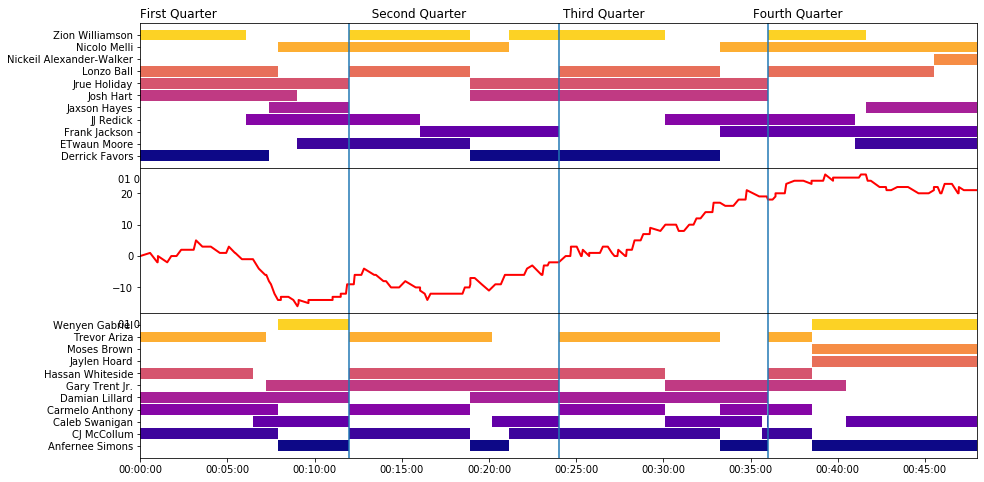

In [78]:
#Define params and run query   
team = 'NOP'
date = '2/11/2020'


gameflow(team, date)

In [79]:
def get_substitution_patterns(df):
    temp_df = df
    
    #Convert to time objects
    temp_df['elapsed'] = pd.to_datetime(temp_df['elapsed'])
    temp_df['play_start'] = pd.to_datetime(temp_df['play_start']).dt.time
    temp_df['play_end'] = pd.to_datetime(temp_df['play_end'])
    
    #Create rounded minute floor column based on play_end values 
    temp_df['minute_flr'] = temp_df['play_end'].dt.floor("T")
    temp_df['minute_flr'] = pd.to_datetime(temp_df['minute_flr']).dt.time
    
    #Get unique players featured in team_lineup
    teammates = temp_df['team_lineup'].unique()
    teammates = teammates.tolist()
    teammates = [i.split(", ") for i in teammates]
    flat_teammates = [item for sublist in teammates for item in sublist]
    flat_teammates = list(dict.fromkeys(flat_teammates))
    
    #Create dummy variable columns for each player in "Flat Teammates"

    dummies = temp_df['team_lineup'].str.get_dummies(sep=', ')
    temp_df = pd.concat([temp_df, dummies], axis=1)
    dummies_df = temp_df.loc[:, temp_df.columns.isin(flat_teammates)]

    #Initialize blank dataframe to append to
    minute_distro = pd.DataFrame()
    
    #Iterate through flat_teammates to get minute distribution for each player
    for i in flat_teammates:
        
        #Group by dummy variable of player
        foo = temp_df.groupby(['game_id','minute_flr'], as_index=False).agg({i: "sum"})
        foo.columns = ['game_id', 'minute', 'on']
        #make dummy variable re-dummied
        foo['on'] = np.where(foo['on'] > 0, 1, 0)
        
        foo_2 = foo.groupby(['minute'], as_index=False).agg({'on': "sum"})
        foo_2['minute'] = range(0,49)
        foo_2['percent'] = foo_2['on']/(temp_df['game_id'].nunique())
        
        #Transpose output lengthwise 
        foo_2 = foo_2.transpose()
        foo_2 = foo_2.iloc[[2]]
        foo_2 = pd.DataFrame(foo_2)
        minute_distro = minute_distro.append(foo_2)
        
    minute_distro.reset_index(inplace = True)
    
    minute_distro.rename(columns = {'index':'Player'}, inplace = True) 
    
    minute_distro['Player'] = flat_teammates
    
    # Setup the different axes
    x = minute_distro.columns.tolist()[1:50]
    y = minute_distro['Player'].tolist()

    # Setup the core data 
    z = minute_distro[x].to_numpy()

    # Plot the heatmap
    hm_plot = go.Figure(go.Heatmap(x = x, y = y, z = z, hoverongaps = False, colorscale='YlOrRd'))
    
    hm_plot.data[0].update(zmin=0.1, zmax=1.0)
    
    #Vertical line y_val
    y_len = int(len(flat_teammates)) * 0.965
    
    #End of 1st
    hm_plot.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=11.5,
            y0=-0.5,
            x1=11.5,
            y1=y_len,
            line=dict(
                color="Black",
                width=1
             )))
    
    #End of 2nd
    hm_plot.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=23.5,
            y0=-0.5,
            x1=23.5,
            y1=y_len,
            line=dict(
                color="Black",
                width=1
             )))
    
    #End of 2nd
    hm_plot.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=35.5,
            y0=-0.5,
            x1=35.5,
            y1=y_len,
            line=dict(
                color="Black",
                width=1
             )))
    
    hm_plot.show()

In [80]:
team = 'HOU'
home_away = ''
start_date = '12/25/2019'
end_date = '10/25/2020'
inc_players = []
exc_players = []
head_tail = 'all'
record = 'W/L'
minimum = .000
maximum = 1.000

dataframe = run_filters(team, home_away, start_date, end_date, inc_players, exc_players, head_tail, record, minimum, maximum)

df = dataframe

get_substitution_patterns(df)